In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np


<AxesSubplot:xlabel='X', ylabel='Y'>

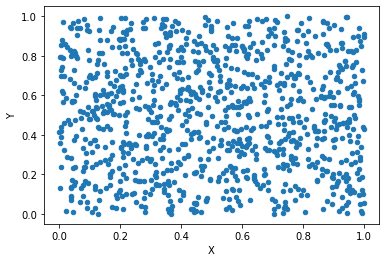

In [2]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

In [3]:
X = np.random.uniform(0,1,1000)
X

array([2.22818786e-01, 7.70720458e-01, 9.08636235e-01, 6.27416679e-01,
       1.01105156e-01, 4.18325772e-01, 9.50762424e-01, 3.74572256e-01,
       1.59414931e-01, 8.57853408e-01, 6.70812848e-01, 4.70558174e-01,
       9.03541505e-01, 9.47930122e-01, 5.81102686e-01, 8.53878921e-01,
       4.61147709e-02, 7.86484305e-01, 7.05067336e-01, 5.83642028e-01,
       1.32087089e-02, 2.00590398e-01, 9.95983272e-01, 2.04329252e-01,
       9.16332532e-01, 4.54329903e-01, 1.50171172e-01, 1.04695935e-01,
       6.88712080e-01, 3.49333306e-01, 1.97259577e-01, 1.77097054e-01,
       3.47312523e-01, 8.44475398e-01, 9.63792743e-01, 7.31656828e-01,
       6.20300317e-01, 7.17878263e-01, 2.75612631e-01, 8.39498145e-02,
       6.58540190e-01, 8.44772284e-03, 2.40660024e-01, 6.65672555e-01,
       2.92569391e-01, 5.42651380e-01, 3.06622901e-01, 3.01616897e-01,
       7.34273892e-01, 8.03007568e-01, 8.48664203e-01, 5.41508380e-01,
       4.20058028e-01, 3.69630960e-01, 3.16754171e-01, 3.20493676e-01,
      

<AxesSubplot:xlabel='X', ylabel='Y'>

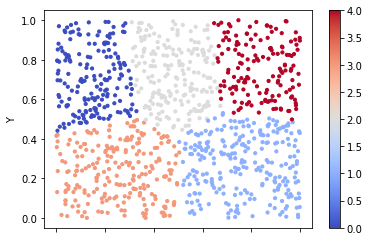

In [4]:
model1 = KMeans(n_clusters=5).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)

In [5]:
df = pd.read_csv("C://Users//HP//Downloads//crime_data.csv")

In [7]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


df_norm = norm_func(df.iloc[:,1:])


df_norm.head(10)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [9]:
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_

array([4, 0, 0, 3, 0, 0, 1, 3, 0, 4, 1, 2, 0, 3, 2, 3, 3, 4, 2, 0, 1, 0,
       2, 4, 3, 3, 3, 0, 2, 1, 0, 0, 4, 2, 1, 3, 3, 1, 1, 4, 2, 4, 0, 1,
       2, 3, 1, 2, 2, 3])

In [10]:
md=pd.Series(model.labels_)  
df['clust']=md 
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [11]:
df.iloc[:,1:7].groupby(df.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,10.966667,264.000000,76.500000,33.608333,0.0
1,4.955556,125.444444,80.111111,17.788889,1.0
2,2.680000,70.100000,51.000000,10.910000,2.0
3,6.975000,148.416667,62.333333,19.775000,3.0
4,14.671429,251.285714,54.285714,21.685714,4.0


In [12]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,4
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,0
